In [5]:
%pylab inline

import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from PIL import Image
import imageio


Populating the interactive namespace from numpy and matplotlib


In [6]:
globaletopo_img = imageio.imread('../../+Data/Resources/ETOPO1_Ice_c_geotiff.tif')

In [7]:
## Make a smaller copy of the image at a more relevant resolution

img = Image.fromarray(globaletopo_img)
im2 = img.resize((2400,1200), Image.BILINEAR )
im2.save("Etopo1_2400x1200.tif")
globaletopo_imgS = imageio.imread("Etopo1_3600x1800.tif")

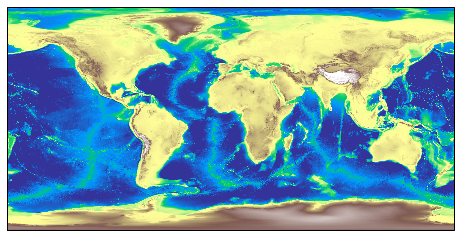

In [8]:
lon=180.0
global_extent     = [-180.0, 180.0, -90.0, 90.0]


projection1 = ccrs.Orthographic(central_longitude=lon, central_latitude=0.0, globe=None)
base_projection = ccrs.PlateCarree()

fig = plt.figure(figsize=(8, 8), facecolor="none")
ax = plt.subplot(111, projection=base_projection)
ax.set_global()
ax.imshow(globaletopo_imgS, origin='upper', 
          transform=base_projection, 
          extent=global_extent, 
          cmap=matplotlib.cm.terrain, vmin=-5000, vmax=5000,
          zorder=0)

In [ ]:
global_extent     = [-180.0, 180.0, -90.0, 90.0]

from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

movie = imageio.get_writer('./etopoimageHs.mp4', fps=25)

for lon in np.linspace(0, 360, 90, endpoint=False):
    
    print("Lon {}".format(lon))
    
    projection1 = ccrs.Orthographic(central_longitude=lon, central_latitude=0.0, globe=None)
    base_projection = ccrs.PlateCarree()

    fig = plt.figure(figsize=(8, 8), facecolor="none")
    canvas = FigureCanvasAgg(fig)
    
    ax = plt.subplot(111, projection=projection1)
    ax.set_global()

    ax.imshow(globaletopo_imgS, origin='upper', 
          transform=base_projection, 
          extent=global_extent, 
          cmap=matplotlib.cm.terrain, vmin=-5000, vmax=5000,
          zorder=0)

    canvas.draw()
    s, (width, height) = canvas.print_to_buffer()
    im = np.frombuffer(s, np.uint8).reshape((height, width, 4))
    movie.append_data(im)
    
    plt.close()


movie.close()

Lon 0.0
Lon 4.0
Lon 8.0
Lon 12.0
Lon 16.0
Lon 20.0
Lon 24.0
Lon 28.0
Lon 32.0
Lon 36.0
Lon 40.0
Lon 44.0
Lon 48.0
Lon 52.0
Lon 56.0
Lon 60.0
Lon 64.0
Lon 68.0
Lon 72.0
Lon 76.0
Lon 80.0
Lon 84.0
Lon 88.0
Lon 92.0
Lon 96.0
Lon 100.0
Lon 104.0
Lon 108.0
Lon 112.0
Lon 116.0
Lon 120.0
Lon 124.0
Lon 128.0
Lon 132.0
Lon 136.0
Lon 140.0
Lon 144.0
Lon 148.0
Lon 152.0
Lon 156.0
Lon 160.0
Lon 164.0
Lon 168.0
Lon 172.0
Lon 176.0
Lon 180.0
Lon 184.0
Lon 188.0
Lon 192.0
Lon 196.0
Lon 200.0
Lon 204.0
Lon 208.0


In [10]:
!open etopoimageHs.mp4